In [1]:
import pandas as pd #pandas库用于读取csv文件

In [2]:
%matplotlib inline
import numpy as np
import re

In [3]:
pip install jieba


The following command must be run outside of the IPython shell:

    $ pip install jieba

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [4]:
import jieba.posseg as psg
import jieba

In [5]:
result = pd.read_csv('result_数据结构.csv').astype(str)
result

,content,id,content_type,agreeCount,mark
0,姥姥的数据结构MOOC可以说是我在中M见过的难度最高的几个课之一（其实我是很想把之一去掉的，...,1,pos,509,5
1,只有我一个人觉得课后编程题和老师讲的根本不在一个难度级别吗QAQ\n一杯茶一包烟 一道链表写一天,2,pos,487,5
2,"for (int i = 0; i < 10000; i ) printf(""讲的太...",3,pos,446,5
3,考研成功~~~姥姥真棒~~~,4,pos,284,5
4,.。。一开始我还以为自己跟不上，认为救我一个人跟不上节奏，后来才发现不只是我一个，我想对第一...,5,pos,255,5
...,...,...,...,...,...
2536,陈老师，举例很容易理解，让我喜欢了数据结构。,2537,pos,0,4
2537,通俗易懂，有一定c语言基础就能学会,2538,pos,0,4
2538,有点启发！,2539,pos,0,4
2539,非常感谢网易，感谢中国慕课这个平台，让我对计算机以及编程有了一个质的飞跃，这里面的老师的讲解...,2540,neg,0,2


In [6]:
result[['content','content_type']].duplicated().sum()
result = result[['content','content_type']].drop_duplicates()
result

,content,content_type
0,姥姥的数据结构MOOC可以说是我在中M见过的难度最高的几个课之一（其实我是很想把之一去掉的，...,pos
1,只有我一个人觉得课后编程题和老师讲的根本不在一个难度级别吗QAQ\n一杯茶一包烟 一道链表写一天,pos
2,"for (int i = 0; i < 10000; i ) printf(""讲的太...",pos
3,考研成功~~~姥姥真棒~~~,pos
4,.。。一开始我还以为自己跟不上，认为救我一个人跟不上节奏，后来才发现不只是我一个，我想对第一...,pos
...,...,...
2536,陈老师，举例很容易理解，让我喜欢了数据结构。,pos
2537,通俗易懂，有一定c语言基础就能学会,pos
2538,有点启发！,pos
2539,非常感谢网易，感谢中国慕课这个平台，让我对计算机以及编程有了一个质的飞跃，这里面的老师的讲解...,neg


In [7]:
result = result[['content','content_type']].drop_duplicates()
result

,content,content_type
0,姥姥的数据结构MOOC可以说是我在中M见过的难度最高的几个课之一（其实我是很想把之一去掉的，...,pos
1,只有我一个人觉得课后编程题和老师讲的根本不在一个难度级别吗QAQ\n一杯茶一包烟 一道链表写一天,pos
2,"for (int i = 0; i < 10000; i ) printf(""讲的太...",pos
3,考研成功~~~姥姥真棒~~~,pos
4,.。。一开始我还以为自己跟不上，认为救我一个人跟不上节奏，后来才发现不只是我一个，我想对第一...,pos
...,...,...
2536,陈老师，举例很容易理解，让我喜欢了数据结构。,pos
2537,通俗易懂，有一定c语言基础就能学会,pos
2538,有点启发！,pos
2539,非常感谢网易，感谢中国慕课这个平台，让我对计算机以及编程有了一个质的飞跃，这里面的老师的讲解...,neg


In [8]:
result.reset_index(drop=True,inplace=True)

In [9]:
content = result['content']
pattern = re.compile('[a-zA-Z0-9]|老师|学生|学习|课程|课件|讲课|讲|讲解|内容|课|解|数据|知识|感觉|视频|姥姥|陈越|水平|质量|作业|网站|同学|编程|结构|浙大|两位')
content = content.apply(lambda x : pattern.sub('',x))
content

0       的可以说是我在中见过的难度最高的几个之一（其实我是很想把之一去掉的，但是话不能说的太死），每...
1                 只有我一个人觉得后题和的根本不在一个难度级别吗\n一杯茶一包烟 一道链表写一天
2                       (  = ;  < ;      ) ("的太好了！！！\n");
3                                            考研成功~~~真棒~~~
4       .。。一开始我还以为自己跟不上，认为救我一个人跟不上节奏，后来才发现不只是我一个，我想对第一...
                              ...                        
2358                                      陈，举例很容易理，让我喜欢了。
2359                                     通俗易懂，有一定语言基础就能学会
2360                                                有点启发！
2361    非常感谢网易，感谢中国慕这个平台，让我对计算机以及有了一个质的飞跃，这里面的的都很严谨，细致...
2362    有了慕这个平台，真是太好了，时间可由自己决定，而且的非常好！给了自己一个机会，对提供慕平台的...
Name: content, Length: 2363, dtype: object

In [10]:
# 自定义简单的分词函数
worker = lambda s : [[x.word,x.flag] for x in psg.cut(s)]   # 单词与词性
seg_word = content.apply(worker)
seg_word

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\黄文颂\AppData\Local\Temp\jieba.cache
Loading model cost 0.378 seconds.
Prefix dict has been built successfully.


0       [[的, uj], [可以, c], [说, v], [是, v], [我, r], [在,...
1       [[只有, c], [我, r], [一个, m], [人, n], [觉得, v], [后...
2       [[ , x], [(, x], [ , x], [ , x], [=, x], [ , x...
3       [[考研, vn], [成功, a], [~, x], [~, x], [~, x], [真...
4       [[., x], [。, x], [。, x], [一, m], [开始, v], [我, ...
                              ...                        
2358    [[陈, nr], [，, x], [举例, n], [很, zg], [容易, a], [...
2359    [[通俗易懂, l], [，, x], [有, v], [一定, d], [语言, n], ...
2360                           [[有点, n], [启发, v], [！, x]]
2361    [[非常感谢, i], [网易, n], [，, x], [感谢, v], [中国, ns]...
2362    [[有, v], [了, ul], [慕, nr], [这个, r], [平台, n], [...
Name: content, Length: 2363, dtype: object

In [11]:
n_word = seg_word.apply(lambda x: len(x)) 
n_content = [[x+1]*y for x,y in zip(list(seg_word.index), list(n_word))]

index_content = [item for sublist in n_content for item in sublist] 
seg_word = [item for sublist in seg_word for item in sublist] 

word = [x[0] for x in seg_word]
nature = [x[1] for x in seg_word]
# content_type评论类型
content_type = [[x]*y for x,y in zip(list(result['content_type']),list(n_word))]
content_type = [item for sublist in content_type for item in sublist] 

# 构造数据框
df = pd.DataFrame({'index_content': index_content,
                      'word' : word,
                      'nature': nature,
                      'content_type' : content_type})
df

,index_content,word,nature,content_type
0,1,的,uj,pos
1,1,可以,c,pos
2,1,说,v,pos
3,1,是,v,pos
4,1,我,r,pos
...,...,...,...,...
25205,2363,的,uj,neg
25206,2363,操作性,n,neg
25207,2363,的,uj,neg
25208,2363,更好,d,neg


In [12]:
# 删除标点符号
df = df[df['nature'] != 'x']
df

,index_content,word,nature,content_type
0,1,的,uj,pos
1,1,可以,c,pos
2,1,说,v,pos
3,1,是,v,pos
4,1,我,r,pos
...,...,...,...,...
25204,2363,发展,vn,neg
25205,2363,的,uj,neg
25206,2363,操作性,n,neg
25207,2363,的,uj,neg


In [13]:
#路径下加载总停用词表stoplist.txt
stop_path = open('stoplist.txt','r',encoding='utf-8')
stop = [x.replace('\n','') for x in stop_path.readlines()]
# 得到非停用词序列
word = list(set(word) - set(stop))
# 判断表格中的单词列是否在非停用词列中
df = df[df['word'].isin(word)]
df

,index_content,word,nature,content_type
6,1,中,f,pos
10,1,难度,d,pos
13,1,几个,m,pos
20,1,想,v,pos
23,1,去掉,v,pos
...,...,...,...,...
25202,2363,跟随,v,neg
25203,2363,时代,n,neg
25204,2363,发展,vn,neg
25206,2363,操作性,n,neg


In [14]:
# 构造各词在评价中的位置列
n_word = list(df.groupby(by=['index_content'])['index_content'].count())
index_word = [list(np.arange(0,x)) for x in n_word]
index_word = [item for sublist in index_word for item in sublist]
df['index_word'] = index_word
df.reset_index(drop=True,inplace=True)
df

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,index_content,word,nature,content_type,index_word
0,1,中,f,pos,0
1,1,难度,d,pos,1
2,1,几个,m,pos,2
3,1,想,v,pos,3
4,1,去掉,v,pos,4
...,...,...,...,...,...
8097,2363,跟随,v,neg,12
8098,2363,时代,n,neg,13
8099,2363,发展,vn,neg,14
8100,2363,操作性,n,neg,15


In [15]:
# 提取含名词的评论的句子id
ind = df[[x == 'n' for x in df['nature']]]['index_content'].unique()
# 提取评价
df = df[df['index_content'].isin(ind)]
# 重置索引
df.reset_index(drop=True,inplace=True)
df

,index_content,word,nature,content_type,index_word
0,1,中,f,pos,0
1,1,难度,d,pos,1
2,1,几个,m,pos,2
3,1,想,v,pos,3
4,1,去掉,v,pos,4
...,...,...,...,...,...
5855,2363,跟随,v,neg,12
5856,2363,时代,n,neg,13
5857,2363,发展,vn,neg,14
5858,2363,操作性,n,neg,15


In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

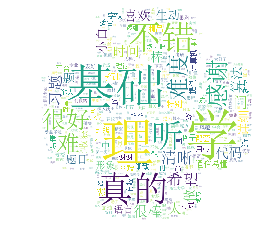

In [17]:
#按word分组统计数目
frequencies = df.groupby(by = ['word'])['word'].count()
# 按数目降序排序
frequencies = frequencies.sort_values(ascending = False)
# 从文件中将图像读取为数组
backgroud_Image=plt.imread('pl.jpeg')
wordcloud = WordCloud(font_path="simsun.ttc",
                      max_words=10000,            # 选择前10000词
                      background_color='white',  # 背景颜色为白色
                      mask=backgroud_Image)
my_wordcloud = wordcloud.fit_words(frequencies)
# 将数据展示到二维图像上
plt.imshow(my_wordcloud)
# 关掉x,y轴
plt.axis('off') 
plt.show()

In [18]:
df.to_csv("word.csv", index = False, encoding = 'utf-8')

In [19]:
word = pd.read_csv('word.csv',header=0)
#读入正负面情感评价词表
pos_comment = pd.read_csv("正面评价词语（中文）.txt", header=None,sep="\n", 
                          encoding = 'utf-8', engine='python')
neg_comment = pd.read_csv("负面评价词语（中文）.txt", header=None,sep="\n", 
                          encoding = 'utf-8', engine='python')
pos_emotion = pd.read_csv("正面情感词语（中文）.txt", header=None,sep="\n", 
                          encoding = 'utf-8', engine='python')
neg_emotion = pd.read_csv("负面情感词语（中文）.txt", header=None,sep="\n", 
                          encoding = 'utf-8', engine='python')

#情感词和评价词的正负面词汇进行合并
positive = set(pos_comment.iloc[:,0])|set(pos_emotion.iloc[:,0])
negative = set(neg_comment.iloc[:,0])|set(neg_emotion.iloc[:,0])

#检索正负面表中相同的词并去除
intersection = positive & negative  
positive = list(positive - intersection)
negative = list(negative - intersection)

#赋予权重，正面词赋权1，负面词赋权-1
positive = pd.DataFrame({"word":positive,
                         "weight":[1]*len(positive)})
negative = pd.DataFrame({"word":negative,
                         "weight":[-1]*len(negative)})
posneg = positive.append(negative)

#将分词结果与正负面情感词表合并，定位情感词
data_posneg = pd.merge(left=word,right=posneg,on='word',how='left')
#先按评论id排序，再按在评论中的位置排序
data_posneg = data_posneg.sort_values(by = ['index_content','index_word'])
data_posneg.to_csv("data_posneg.csv", index = False, encoding = 'utf-8')

In [20]:
#加载否定词表
notdict = pd.read_csv("not.csv")

#构造新列，处理否定词
data_posneg['amend_weight'] = data_posneg['weight'] 
data_posneg['id'] = np.arange(0, len(data_posneg))

#只保留有情感值的词语
only_inclination = data_posneg.dropna()  

#修改索引
only_inclination.index = np.arange(0, len(only_inclination))
only_inclination

,index_content,word,nature,content_type,index_word,weight,amend_weight,id
0,7,感谢,v,pos,16,1.0,1.0,98
1,21,赞,v,pos,4,1.0,1.0,219
2,25,好评,v,pos,4,1.0,1.0,244
3,27,高,a,pos,3,-1.0,-1.0,263
4,27,感谢,v,pos,9,1.0,1.0,269
...,...,...,...,...,...,...,...,...
169,2355,还好,v,pos,0,1.0,1.0,5806
170,2355,高,a,pos,2,-1.0,-1.0,5808
171,2359,喜欢,v,pos,3,1.0,1.0,5823
172,2362,感谢,v,neg,2,1.0,1.0,5830


In [21]:
import builtins
round = getattr(builtins, "round")

In [22]:
index = only_inclination['id']
for i in np.arange(0, len(only_inclination)):
    #提取第i个情感词所在的评论
    result = data_posneg[data_posneg['index_content'] == only_inclination['index_content'][i]]  
    #修改索引
    result.index = np.arange(0, len(result))
    #第i个情感值在该文档的位置
    affective = only_inclination['index_word'][i]  
    if affective == 1:
        #情感词前面的单词是否在否定词表
        ne = sum([i in notdict['term'] for i in result['word'][affective - 1]])
        if ne == 1:
            data_posneg['amend_weight'][index[i]] = -data_posneg['weight'][index[i]]          
    elif affective > 1:
        #情感词前面两个位置的词语是否在否定词，存在一个调整成相反的情感权重，存在两个就不调整
        ne = sum([i in notdict['term'] for i in result['word'][[affective - 1, affective - 2]]])
        if ne == 1:
            data_posneg['amend_weight'][index[i]] = -data_posneg['weight'][index[i]]

In [23]:
# 计算每条评论的情感值
emotional_value = only_inclination.groupby(['index_content'],as_index=False)['amend_weight'].sum()
# 去除情感值为0的评论
emotional_value = emotional_value[emotional_value['amend_weight'] != 0]
emotional_value.reset_index(drop=True,inplace=True)
emotional_value

,index_content,amend_weight
0,7,1.0
1,21,1.0
2,25,1.0
3,50,2.0
4,62,-1.0
...,...,...
143,2334,-1.0
144,2335,1.0
145,2351,1.0
146,2359,1.0


In [24]:
#给情感值大于0的赋予评论类型pos，小于0的赋予neg
emotional_value['a_type'] = ''
emotional_value['a_type'][emotional_value['amend_weight'] > 0] = 'pos'
emotional_value['a_type'][emotional_value['amend_weight'] < 0] = 'neg'
#查看情感分析的结果
df = pd.merge(left=word,right=emotional_value,on='index_content',how='right')

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [25]:
#去重
df = df[['index_content','content_type', 'a_type']].drop_duplicates() 
df

,index_content,content_type,a_type
0,7,pos,pos
20,21,pos,pos
25,25,pos,pos
38,50,pos,pos
44,62,pos,neg
...,...,...,...
1139,2334,pos,neg
1159,2335,pos,pos
1163,2351,pos,pos
1165,2359,pos,pos


In [26]:
#混淆矩阵-交叉表
confusion_matrix = pd.crosstab(df['content_type'],df['a_type'],margins=True)
confusion_matrix

a_type,neg,pos,All
content_type,,,
neg,0,2,2
pos,20,126,146
All,20,128,148


In [27]:
#准确率
(confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,1])/confusion_matrix.iloc[2,2]

0.8513513513513513

In [28]:
#提取正负面评论信息
#得到正面评论与负面评论对应的索引
ind_pos = list(emotional_value[emotional_value['a_type'] == 'pos']['index_content'])
ind_neg = list(emotional_value[emotional_value['a_type'] == 'neg']['index_content'])
#得到正面评论与负面评论
posdata = word[[i in ind_pos for i in word['index_content']]]
negdata = word[[i in ind_neg for i in word['index_content']]]

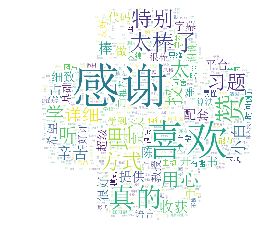

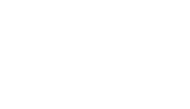

In [29]:
#绘制正面情感词云
#正面情感词词云
freq_pos = posdata.groupby(by = ['word'])['word'].count()
freq_pos = freq_pos.sort_values(ascending = False)
backgroud_Image=plt.imread('pl.jpeg')
wordcloud = WordCloud(font_path="simsun.ttc",
                      max_words=10000,
                      background_color='white',
                      mask=backgroud_Image)
pos_wordcloud = wordcloud.fit_words(freq_pos)
plt.imshow(pos_wordcloud)
plt.axis('off') 
plt.figure(figsize=(12, 7), dpi=20)
plt.axis("off")
plt.show()

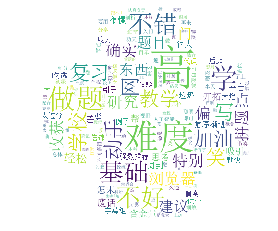

In [30]:
#绘制负面评论词云
freq_neg = negdata.groupby(by = ['word'])['word'].count()
freq_neg = freq_neg.sort_values(ascending = False)
neg_wordcloud = wordcloud.fit_words(freq_neg)
plt.imshow(neg_wordcloud)
plt.axis('off') 
plt.show()

In [31]:
#将结果写出,每条评论作为一行
posdata.to_csv("posdata.csv", index = False, encoding = 'utf-8')
negdata.to_csv("negdata.csv", index = False, encoding = 'utf-8')

In [35]:
import csv
import pandas as pd
list_set = []
with open("posdata.csv", 'r', encoding = 'utf-8') as f:
    reader = csv.reader(f)
    for row in reader:                         #读取每一列数据
        for word in row:                       #读取每一个元素
            if '\u4e00' <= word <= '\u9fff':   #判断是否为中文字符串
#             print(word)
                list_set.append(word)          #元素添加到集合
    
from collections import Counter
words_count = Counter(list_set)
statics = words_count.most_common()[:50]   #得到词频排序前5名
print(statics)

[('感谢', 49), ('喜欢', 37), ('赞', 19), ('真的', 13), ('理', 13), ('太棒了', 9), ('太', 8), ('特别', 8), ('方式', 8), ('用心', 7), ('授', 7), ('学', 7), ('听', 7), ('详细', 7), ('习题', 7), ('点', 6), ('棒', 6), ('辛苦', 6), ('小白', 6), ('配套', 6), ('收获', 6), ('很好', 6), ('提供', 6), ('完美', 6), ('开', 5), ('代码', 5), ('陈', 5), ('教授', 5), ('做', 5), ('希望', 5), ('细致', 5), ('超级', 5), ('书', 5), ('字幕', 5), ('基础', 5), ('难', 5), ('中', 5), ('平台', 5), ('好评', 4), ('很棒', 4), ('友好', 4), ('厉害', 4), ('门', 4), ('时间', 4), ('语言', 4), ('推荐', 4), ('算法', 4), ('谢谢', 4), ('学到', 4), ('学校', 3)]


In [36]:
import csv
import pandas as pd
list_set = []
with open("negdata.csv", 'r', encoding = 'utf-8') as f:
    reader = csv.reader(f)
    for row in reader:                         #读取每一列数据
        for word in row:                       #读取每一个元素
            if '\u4e00' <= word <= '\u9fff':   #判断是否为中文字符串
#             print(word)
                list_set.append(word)          #元素添加到集合
    
from collections import Counter
words_count = Counter(list_set)
statics = words_count.most_common()[:50]   #得到词频排序前5名
print(statics)

[('高', 14), ('难度', 7), ('学', 4), ('做题', 4), ('基础', 3), ('不好', 3), ('不错', 3), ('确实', 2), ('写', 2), ('收获', 2), ('加油', 2), ('偏', 2), ('题目', 2), ('东西', 2), ('网', 2), ('拼题', 2), ('学校', 2), ('研究', 2), ('复习', 2), ('特别', 2), ('笑', 2), ('点', 2), ('轻松', 2), ('门', 2), ('动手', 2), ('教学', 2), ('建议', 2), ('浏览器', 2), ('非', 1), ('科班', 1), ('习题', 1), ('开拓', 1), ('视野', 1), ('差', 1), ('很慢', 1), ('满满的', 1), ('第一', 1), ('概念', 1), ('真好', 1), ('吸引', 1), ('真', 1), ('的的', 1), ('周到', 1), ('适合', 1), ('刷及', 1), ('观看', 1), ('吃透', 1), ('赞', 1), ('认真负责', 1), ('强烈推荐', 1)]
